In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
path_all = "https://raw.githubusercontent.com/VoronkaAlexandr/Sars_Cov_2_MutSpec/main/Sars_Cov_2/new_data/data_obtained/MutChange_12spec_normed_one.csv"
path_syn = "https://raw.githubusercontent.com/VoronkaAlexandr/Sars_Cov_2_MutSpec/main/Sars_Cov_2/new_data/data_obtained/MutChange_12spec_SYN_normed_byone.csv"
path_ff = "https://raw.githubusercontent.com/VoronkaAlexandr/Sars_Cov_2_MutSpec/main/Sars_Cov_2/new_data/data_obtained/MutChange_12spec_FF_normed_byone.csv"

In [17]:
def plot_time_mutspec(time_mutspec, outpath=None, label=""):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    time_mutspec.plot(kind='bar', stacked=True, ax=ax, )  # colormap="turbo"
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title='Mut', loc='upper left', bbox_to_anchor=(1.02,1))
    ax.set_xlabel("Time period")
    ax.set_ylabel("MutSpec")
    ax.set_title("MutSpec by time, " + label);
    if outpath is not None:
        fig.savefig(outpath, bbox_inches="tight", pad_inches=.5)
    plt.show()

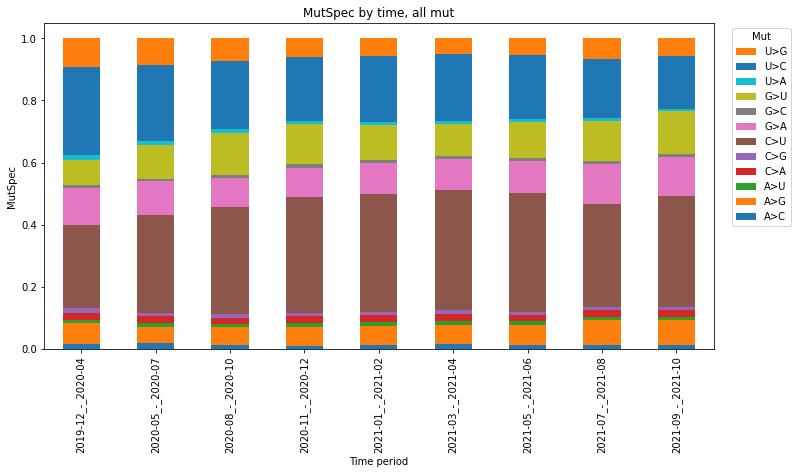

In [30]:
mutspec = pd.read_csv(path_all, index_col=0)
time_mutspec_all = mutspec.pivot("variable", "NucSubst", "value")
# time_mutspec = time_mutspec.iloc[:, np.argsort(time_mutspec.values[0])]

plot_time_mutspec(time_mutspec_all, "../figures/mutspec_by_time_all.jpg", "all mut")

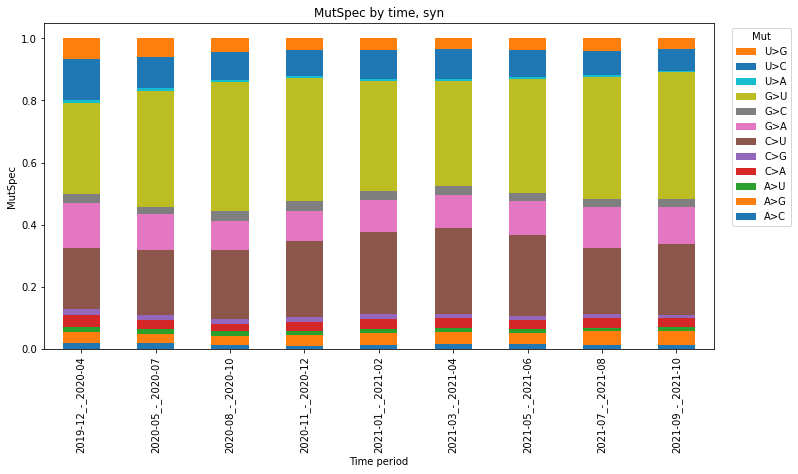

In [31]:
mutspec = pd.read_csv(path_syn, index_col=0)
time_mutspec_syn = mutspec.pivot("variable", "NucSubst", "value")
plot_time_mutspec(time_mutspec_syn, "../figures/mutspec_by_time_syn.jpg", "syn")

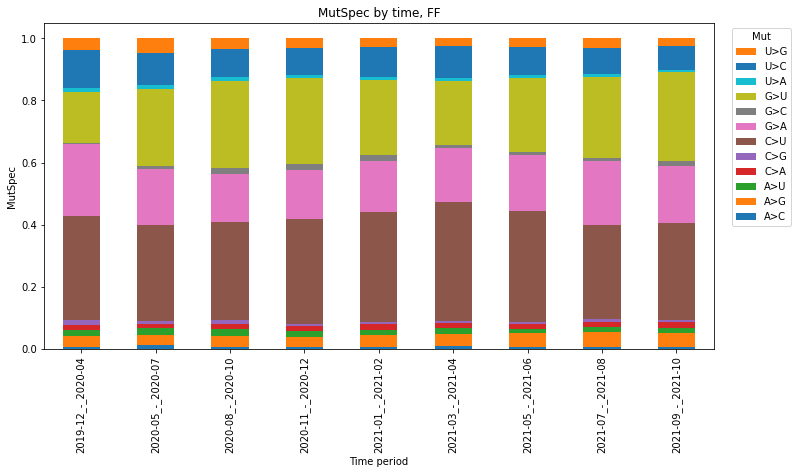

In [32]:
mutspec = pd.read_csv(path_ff, index_col=0)
time_mutspec_ff = mutspec.pivot("variable", "NucSubst", "value")
plot_time_mutspec(time_mutspec_ff, "../figures/mutspec_by_time_ff.jpg", "FF")

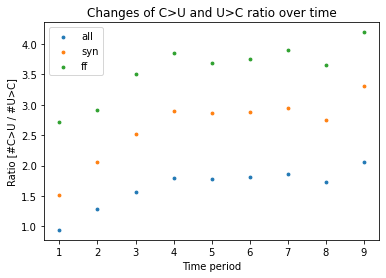

In [59]:
x = np.arange(1, time_mutspec_all.shape[0] + 1)
y1 = time_mutspec_all["C>U"] / time_mutspec_all["U>C"]
y2 = time_mutspec_syn["C>U"] / time_mutspec_syn["U>C"]
y3 = time_mutspec_ff["C>U"] / time_mutspec_ff["U>C"]

params = {"s": 8}
plt.scatter(x, y1, label="all", **params)
plt.scatter(x, y2, label="syn", **params)
plt.scatter(x, y3, label="ff", **params)
plt.title("Changes of C>U and U>C ratio over time")
plt.xlabel("Time period")
plt.ylabel("Ratio [#C>U / #U>C]")
plt.legend()
plt.savefig("../figures/CU_UC_ratio.jpg")
plt.show()